In [1]:
import os
from itertools import combinations
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, gaussian_kde
import pickle
from matplotlib import rcParams, cycler
from matplotlib.cm import ScalarMappable
#import cmasher as cmr
from sgcc_model12 import *

In [2]:
X = tf.convert_to_tensor([0.02,0.04,0.08,0.1,0.12,0.16,0.2,0.24,0.28,0.32], dtype = tf.float32)

In [3]:
v1_xs_file = f"v1_ori_phase_condition_pcascores.pkl"
v1_scores = pd.read_pickle(os.path.join('c:\\',*os.getcwd().split('\\')[1:-1], v1_xs_file))
#v1_scores = pd.read_pickle(os.path.join('/',*os.getcwd().split('/')[:-1], v1_xs_file))
v1_scores_condition_averaged = np.array([np.array(x) for x in v1_scores.scores.values]).mean(0)

In [4]:
Y_true = v1_scores_condition_averaged[:2,:,:].transpose(0,2,1)

In [5]:
param_bounds = {
    "fts": [20, 200],
    "t": [40, 100],
    "ats": [-3, 0],
    "a": [0.1, 4],
    "d": [10, 40],
    "inh_d": [0, 40],
    "inh_w": [0, 3],
}

In [6]:
with open(f'sgcc_mop_2_9_26.pkl', 'rb') as f:
    result = pickle.load(f)
params = result['final_epoch_params']

In [7]:
sgcc = SGCCircuit(param_bounds)

In [8]:
sgcc.load_saved_parameters(params)

In [9]:
## Merge all parameters into a single structure, dim = (exploration samples x epochs, parameters)
## The parameters are ordered as the following:
## dLGN0-1x5, dLGN0-2x5, dLGN0-3x5
## dLGN1-1x5, dLGN1-2x5, dLGN1-3x5
## V1-0x2, V1-1x2
## Where the 5 dLGN parameters are: 
## 1) Frequency-time slope, 2) onset time, 3) Amplitude-time slope
## 4) Amplitude, Response Duration
## And the 2 V1 parameters are:
## 1) Inhibition delay, 2) Inhibition weight 

r1 = result['param_history']['dLGN_params'].squeeze()[:]
r2 = result['param_history']['V1_params'].squeeze()[:]

n_samples, n_epochs = r1.shape[:2]
n_params = np.prod(r1.shape[2:]) + np.prod(r2.shape[2:])

r1 = r1.reshape(r1.shape[0] * r1.shape[1], np.prod(r1.shape[2:]))
r2 = r2.reshape(r2.shape[0] *  r2.shape[1], np.prod(r2.shape[2:]))

res = np.concatenate([r1, r2], axis = 1)

In [10]:
res_unflat = res.reshape(n_samples, n_epochs, n_params)

In [11]:
def minmax_norm(array, lower, upper):
    if (array.max() - array.min()) != 0:
        norm = (array - array.min()) / (array.max() - array.min())
        return lower + (norm * (upper-lower))
    else:
        return array

Text(0.54, 0.98, 'Frequency-time slopes of dLGN inputs into V1_1')

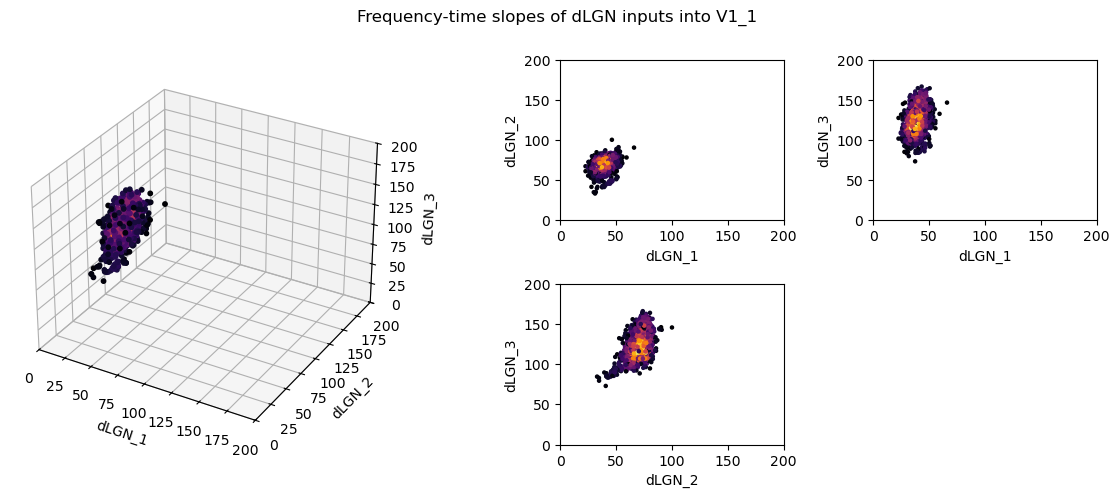

In [12]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 0],
    res_unflat[:,-1, 5],
    res_unflat[:,-1, 10],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(0, 200)
ax[0].set_ylim(0, 200)
ax[0].set_zlim(0, 200)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(0, 200)
    ax[i+1].set_ylim(0, 200)

plt.suptitle("Frequency-time slopes of dLGN inputs into V1_1", x = 0.54)

Text(0.54, 0.98, 'Frequency-time slopes of dLGN inputs into V1_2')

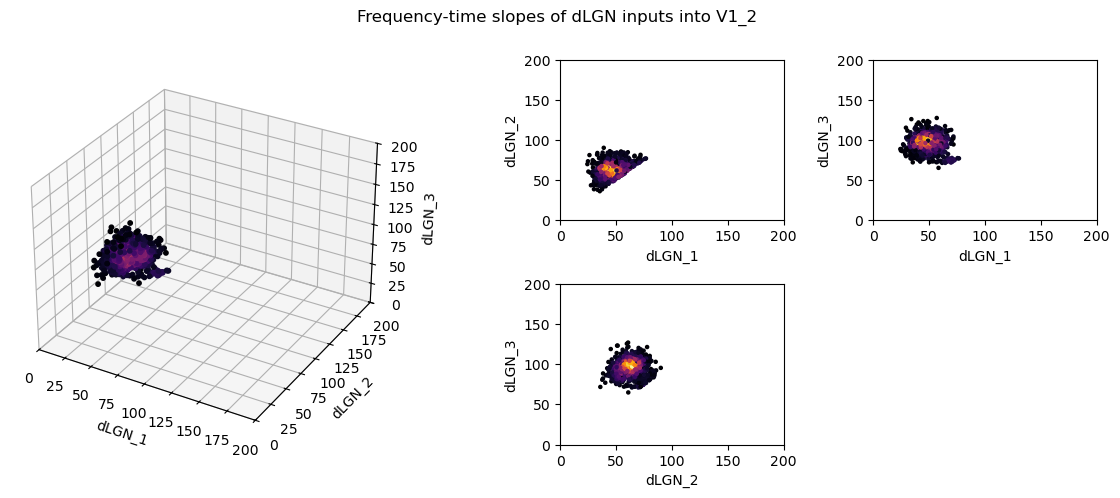

In [13]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 15],
    res_unflat[:,-1, 20],
    res_unflat[:,-1, 25],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(0, 200)
ax[0].set_ylim(0, 200)
ax[0].set_zlim(0, 200)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(0, 200)
    ax[i+1].set_ylim(0, 200)

plt.suptitle("Frequency-time slopes of dLGN inputs into V1_2", x = 0.54)

Text(0.54, 0.98, 'Response latencies of dLGN inputs into V1_1')

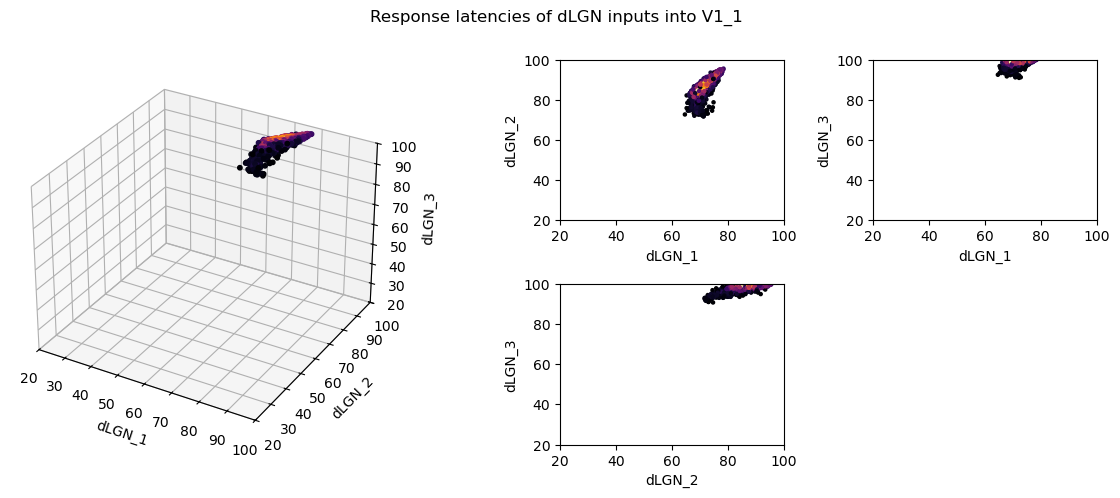

In [14]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 1],
    res_unflat[:,-1, 6],
    res_unflat[:,-1, 11],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(20, 100)
ax[0].set_ylim(20, 100)
ax[0].set_zlim(20, 100)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(20, 100)
    ax[i+1].set_ylim(20, 100)

plt.suptitle("Response latencies of dLGN inputs into V1_1", x = 0.54)

Text(0.54, 0.98, 'Response latencies of dLGN inputs into V1_2')

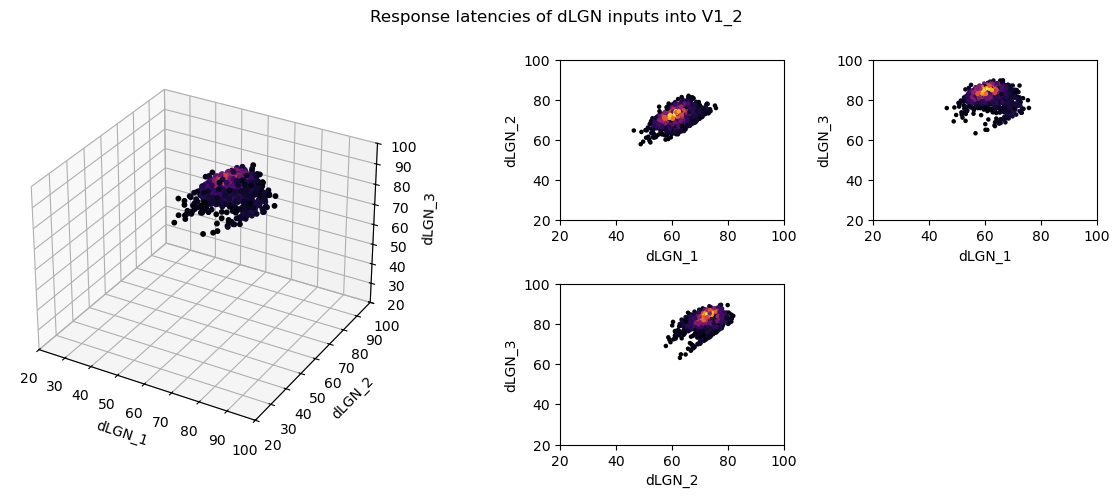

In [15]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 16],
    res_unflat[:,-1, 21],
    res_unflat[:,-1, 26],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(20, 100)
ax[0].set_ylim(20, 100)
ax[0].set_zlim(20, 100)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(20, 100)
    ax[i+1].set_ylim(20, 100)

plt.suptitle("Response latencies of dLGN inputs into V1_2", x = 0.54)

Text(0.54, 0.98, 'Amplitude-time slopes of dLGN inputs into V1_1')

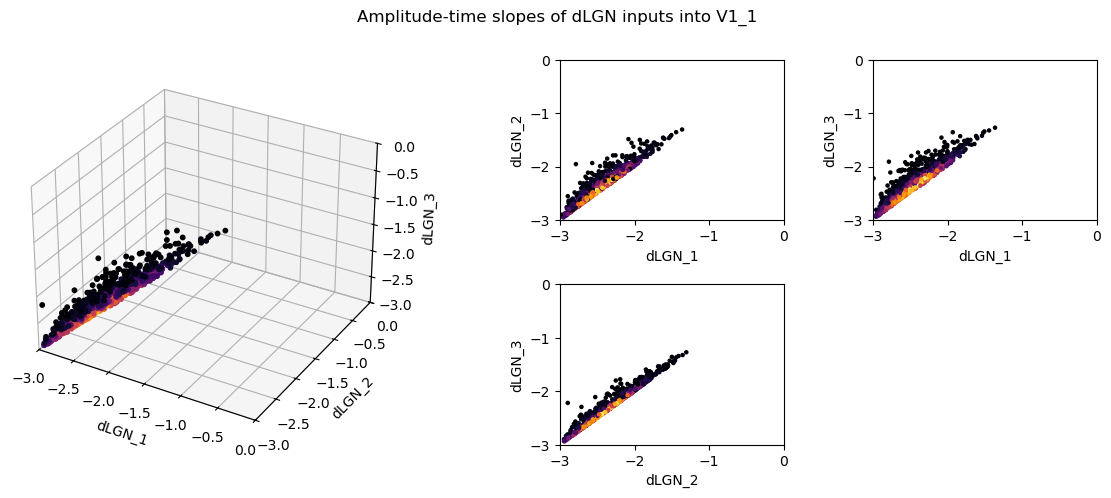

In [16]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 2],
    res_unflat[:,-1, 7],
    res_unflat[:,-1, 12],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(-3, 0)
ax[0].set_ylim(-3, 0)
ax[0].set_zlim(-3, 0)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(-3, 0)
    ax[i+1].set_ylim(-3, 0)

plt.suptitle("Amplitude-time slopes of dLGN inputs into V1_1", x = 0.54)

Text(0.54, 0.98, 'Amplitude-time slopes of dLGN inputs into V1_2')

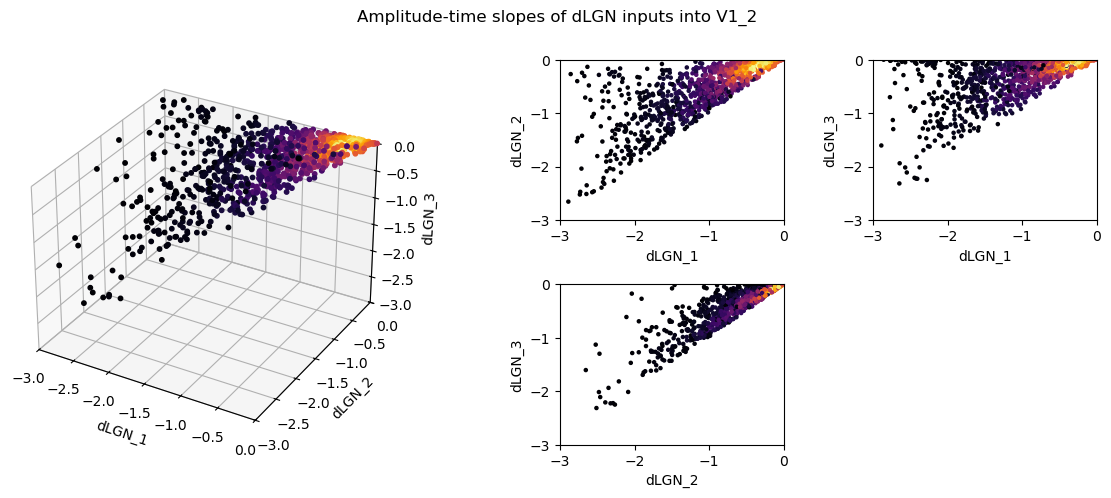

In [17]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 17],
    res_unflat[:,-1, 22],
    res_unflat[:,-1, 27],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(-3, 0)
ax[0].set_ylim(-3, 0)
ax[0].set_zlim(-3, 0)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(-3, 0)
    ax[i+1].set_ylim(-3, 0)

plt.suptitle("Amplitude-time slopes of dLGN inputs into V1_2", x = 0.54)

Text(0.54, 0.98, 'Initial amplitudes of dLGN inputs into V1_1')

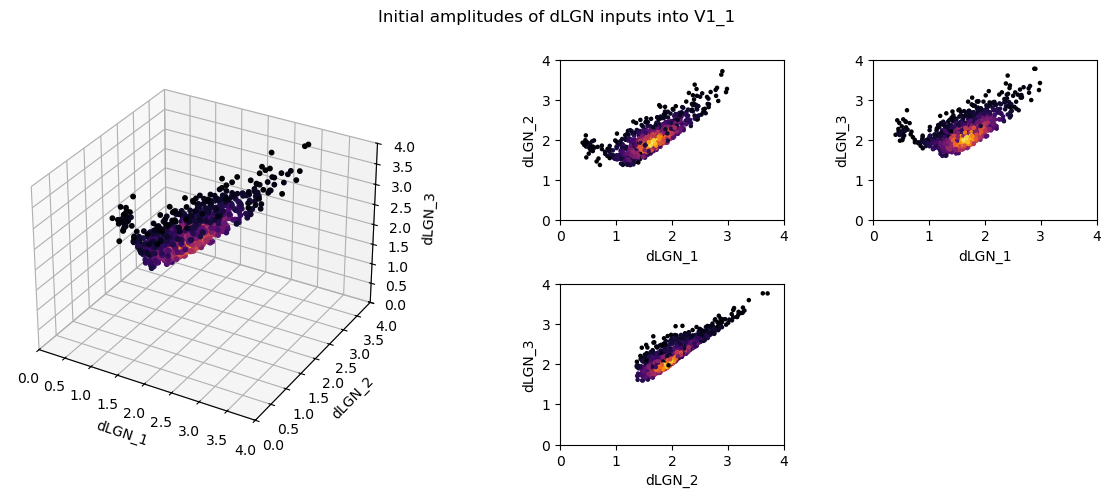

In [18]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 3],
    res_unflat[:,-1, 8],
    res_unflat[:,-1, 13],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(0, 4)
ax[0].set_ylim(0, 4)
ax[0].set_zlim(0, 4)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(0, 4)
    ax[i+1].set_ylim(0, 4)

plt.suptitle("Initial amplitudes of dLGN inputs into V1_1", x = 0.54)

Text(0.54, 0.98, 'Initial amplitudes of dLGN inputs into V1_2')

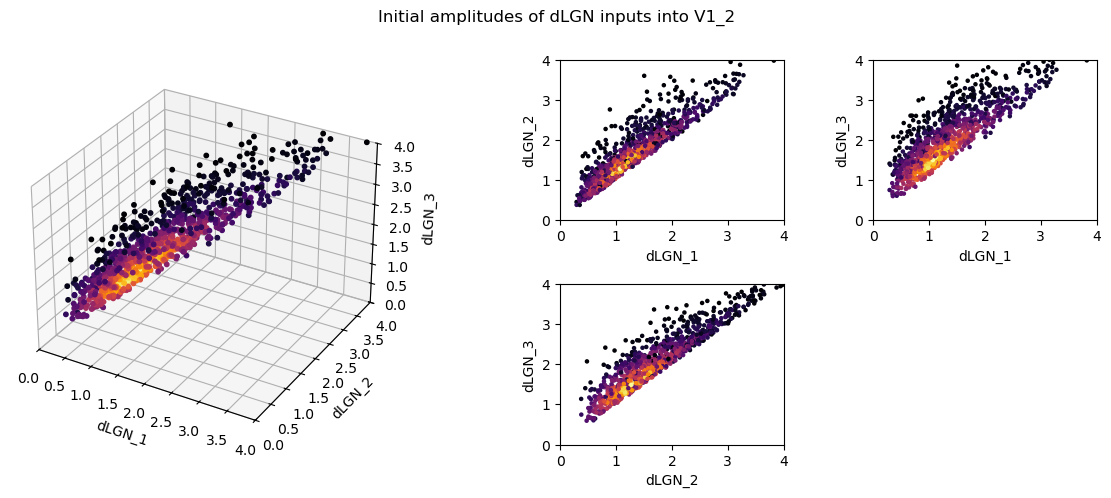

In [19]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 18],
    res_unflat[:,-1, 23],
    res_unflat[:,-1, 28],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(0, 4)
ax[0].set_ylim(0, 4)
ax[0].set_zlim(0, 4)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(0, 4)
    ax[i+1].set_ylim(0, 4)

plt.suptitle("Initial amplitudes of dLGN inputs into V1_2", x = 0.54)

Text(0.54, 0.98, 'Responde durations of dLGN inputs into V1_1')

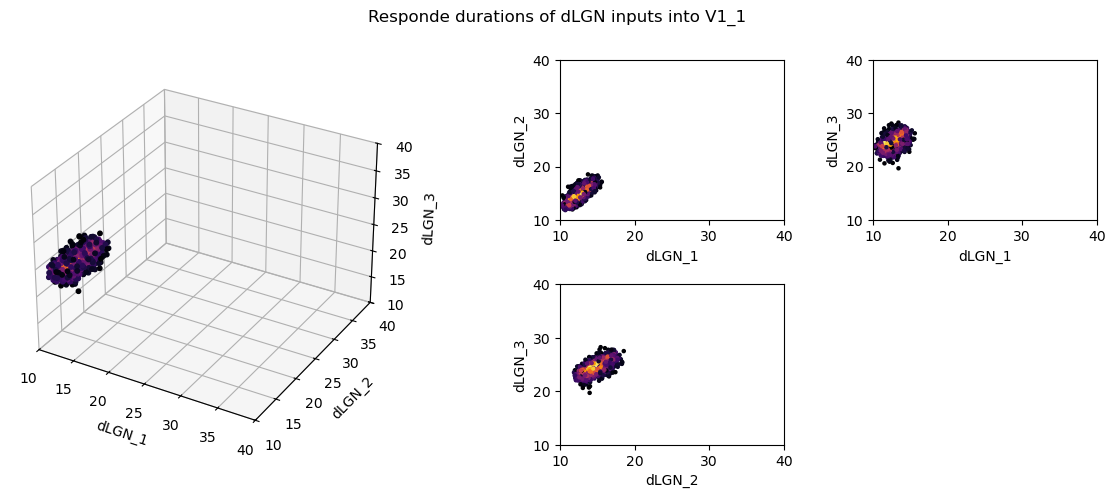

In [20]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 4],
    res_unflat[:,-1, 9],
    res_unflat[:,-1, 14],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(10, 40)
ax[0].set_ylim(10, 40)
ax[0].set_zlim(10, 40)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(10, 40)
    ax[i+1].set_ylim(10, 40)

plt.suptitle("Responde durations of dLGN inputs into V1_1", x = 0.54)

Text(0.54, 0.98, 'Response durations of dLGN inputs into V1_2')

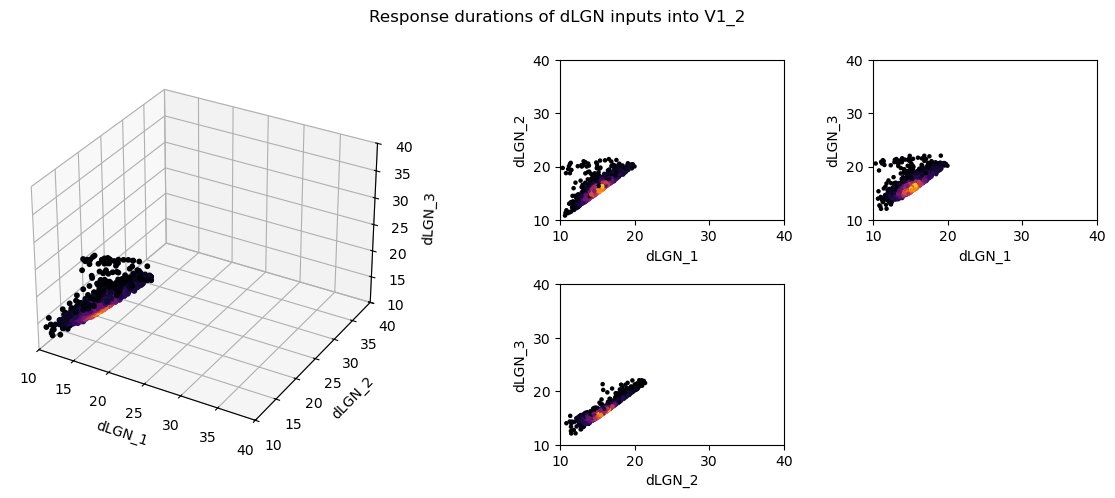

In [21]:
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(2, 4, hspace=0.4, wspace=0.4)
ax = [
    fig.add_subplot(grid[:2,:2], projection='3d'),
    fig.add_subplot(grid[0,2]),
    fig.add_subplot(grid[0,3]),
    fig.add_subplot(grid[1,2])
]

data = np.array([
    res_unflat[:,-1, 19],
    res_unflat[:,-1, 24],
    res_unflat[:,-1, 29],
])

kde = gaussian_kde(data)
density = kde(data)
cmap = plt.get_cmap('inferno')(minmax_norm(density, 0, 1))

ax[0].scatter3D(
    data[0],
    data[1],
    data[2],
    color = cmap,
    s = 10,
    alpha = 1
)

ax[0].set_xlim(10, 40)
ax[0].set_ylim(10, 40)
ax[0].set_zlim(10, 40)

labels = [
    "dLGN_1",
    "dLGN_2",
    "dLGN_3"
]

ax[0].set_xlabel(labels[0])
ax[0].set_ylabel(labels[1])
ax[0].set_zlabel(labels[2])

combos = combinations(np.arange(3), 2)

for i, combo in enumerate(combos):
    x_i, y_i = combo

    x = data[x_i]
    y = data[y_i]

    xlabel = labels[x_i]
    ylabel = labels[y_i]

    ax[i+1].scatter(x, y, color = cmap, s = 5, alpha = 1)
    ax[i+1].set_xlabel(xlabel)
    ax[i+1].set_ylabel(ylabel)
    ax[i+1].set_xlim(10, 40)
    ax[i+1].set_ylim(10, 40)

plt.suptitle("Response durations of dLGN inputs into V1_2", x = 0.54)

In [22]:
last_epoch_loss = result['loss_decay'][-1]
best = np.where(last_epoch_loss == last_epoch_loss.min())[0][0]

## Conditions to test:
1) Manually set parameters, reoptimize without constrains

    a) Does the parameter favor a new optimum or go back to the old one?

2) Manually set parameters, reoptimize with manually set parameters clamped to thier position

    b) What solutions can the optimizer find with the manually set parameters frozen?

3) Manually set parameters, reoptimize while preventing manually set parameters from going to their old solution:

    c) If the answer to a) is the latter, what solutions can the optimizer find if forced to avoid the best optimum?

In [23]:
predictions = sgcc.predict(X)

In [24]:
v1_neuron_1, v1_neuron_2 = predictions[best]

In [25]:
low_sf_1 = v1_neuron_1[0]
high_sf_1 = v1_neuron_1[-1]

low_sf_2 = v1_neuron_2[0]
high_sf_2 = v1_neuron_2[-1]

Text(0.5, 1.1, 'V1 Neuron 1')

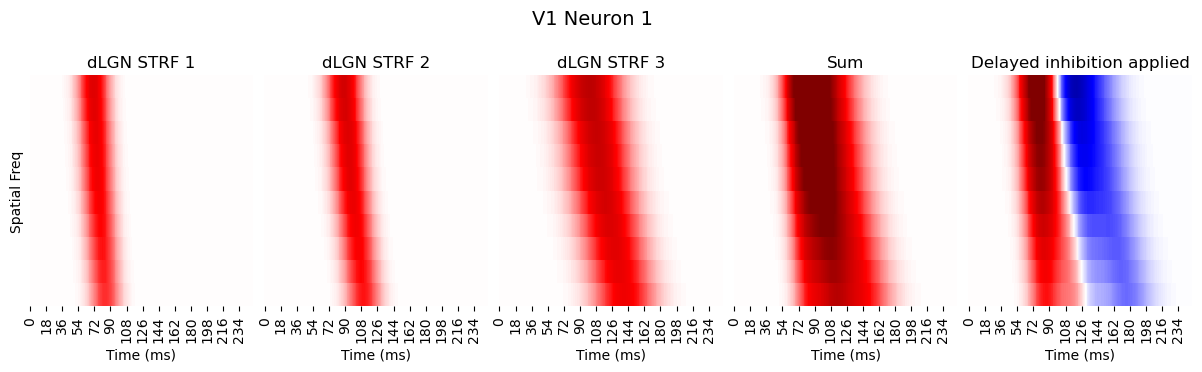

In [26]:
fig, ax = plt.subplots(1,5, figsize = (15,3))

sns.heatmap(sgcc.dlgn_exc[best][0,0], ax = ax[0], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(sgcc.dlgn_exc[best][0,1], ax = ax[1], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(sgcc.dlgn_exc[best][0,2], ax = ax[2], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(sgcc.v1_exc[best][0], ax = ax[3], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(predictions[best][0], ax = ax[4], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)

for i in range(5):
    ax[i].set_yticks([])
    ax[i].set_xlabel("Time (ms)")

fig.subplots_adjust(wspace=0.05)
ax[0].set_ylabel("Spatial Freq")

ax[0].set_title("dLGN STRF 1")
ax[1].set_title("dLGN STRF 2")
ax[2].set_title("dLGN STRF 3")
ax[3].set_title("Sum")
ax[4].set_title("Delayed inhibition applied")

plt.suptitle("V1 Neuron 1", y = 1.1, fontsize = 14)

Text(0.5, 1.1, 'V1 Neuron 2')

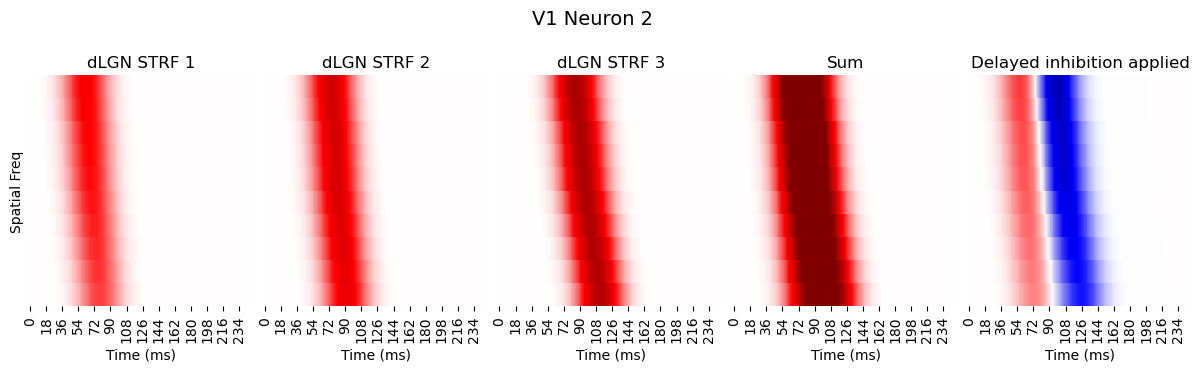

In [27]:
fig, ax = plt.subplots(1,5, figsize = (15,3))

sns.heatmap(sgcc.dlgn_exc[best][1,0], ax = ax[0], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(sgcc.dlgn_exc[best][1,1], ax = ax[1], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(sgcc.dlgn_exc[best][1,2], ax = ax[2], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(sgcc.v1_exc[best][1], ax = ax[3], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)
sns.heatmap(predictions[best][1], ax = ax[4], cbar = False, cmap = 'seismic', vmin = -3, vmax = 3)

for i in range(5):
    ax[i].set_yticks([])
    ax[i].set_xlabel("Time (ms)")

fig.subplots_adjust(wspace=0.05)
ax[0].set_ylabel("Spatial Freq")

ax[0].set_title("dLGN STRF 1")
ax[1].set_title("dLGN STRF 2")
ax[2].set_title("dLGN STRF 3")
ax[3].set_title("Sum")
ax[4].set_title("Delayed inhibition applied")

plt.suptitle("V1 Neuron 2", y = 1.1, fontsize = 14)

Text(0.5, 1.0, 'Delayed inhibition applied')

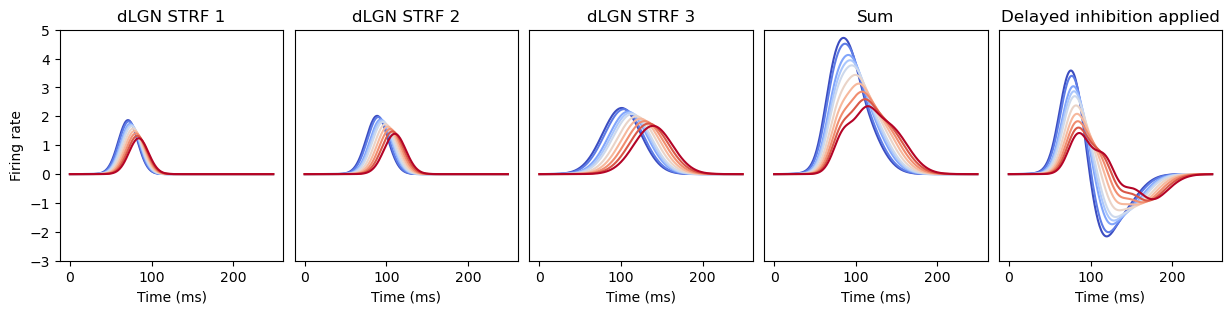

In [28]:
cmap = plt.get_cmap('coolwarm') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))
fig, ax = plt.subplots(1,5, figsize = (15,3))

ax[0].plot(sgcc.dlgn_exc[best][0,0].numpy().T)
ax[1].plot(sgcc.dlgn_exc[best][0,1].numpy().T)
ax[2].plot(sgcc.dlgn_exc[best][0,2].numpy().T)
ax[3].plot(sgcc.v1_exc[best][0].numpy().T)
ax[4].plot(predictions[best][0].numpy().T)

for i in range(5):
    #ax[i].set_yticks([])
    if i>0:
        ax[i].set_yticks([])
    ax[i].set_ylim(-3,5)
    ax[i].set_xlabel("Time (ms)")

fig.subplots_adjust(wspace=0.05)
ax[0].set_ylabel("Firing rate")

ax[0].set_title("dLGN STRF 1")
ax[1].set_title("dLGN STRF 2")
ax[2].set_title("dLGN STRF 3")
ax[3].set_title("Sum")
ax[4].set_title("Delayed inhibition applied")

#plt.suptitle("Example model output", y = 1.1, fontsize = 14)

Text(0.5, 1.1, 'V1 Neuron 2 (Low latency unit)')

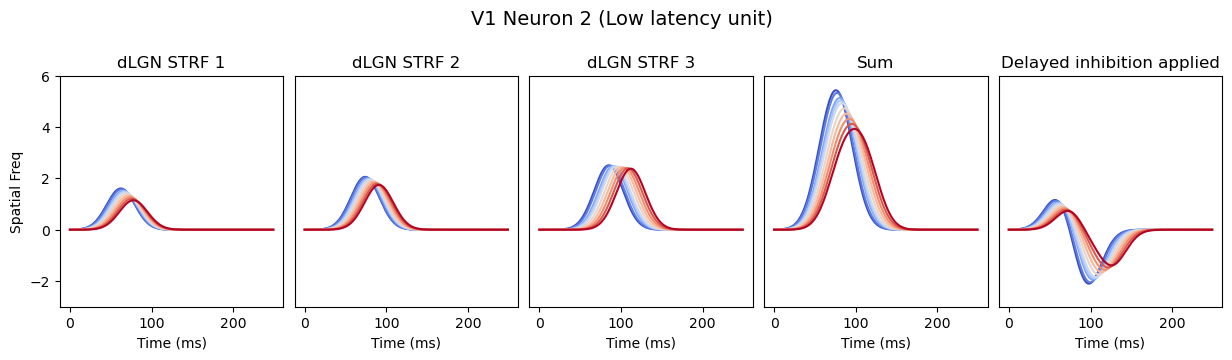

In [29]:
fig, ax = plt.subplots(1,5, figsize = (15,3))

ax[0].plot(sgcc.dlgn_exc[best][1,0].numpy().T)
ax[1].plot(sgcc.dlgn_exc[best][1,1].numpy().T)
ax[2].plot(sgcc.dlgn_exc[best][1,2].numpy().T)
ax[3].plot(sgcc.v1_exc[best][1].numpy().T)
ax[4].plot(predictions[best][1].numpy().T)

for i in range(5):
    #ax[i].set_yticks([])
    if i>0:
        ax[i].set_yticks([])
    ax[i].set_ylim(-3,6)
    ax[i].set_xlabel("Time (ms)")

fig.subplots_adjust(wspace=0.05)
ax[0].set_ylabel("Spatial Freq")

ax[0].set_title("dLGN STRF 1")
ax[1].set_title("dLGN STRF 2")
ax[2].set_title("dLGN STRF 3")
ax[3].set_title("Sum")
ax[4].set_title("Delayed inhibition applied")

plt.suptitle("V1 Neuron 2 (Low latency unit)", y = 1.1, fontsize = 14)

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\137540934.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


Text(0.5, 0, 'Time (ms)')

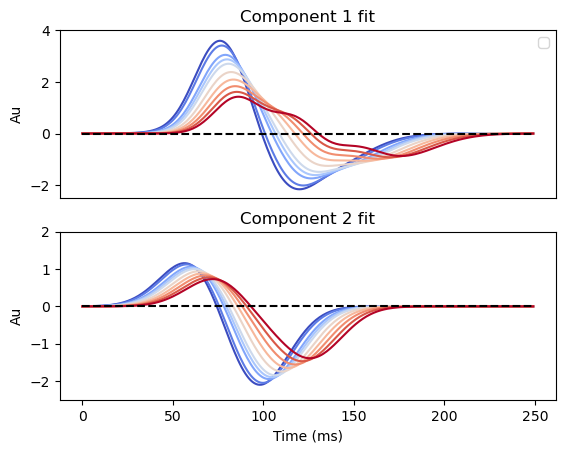

In [30]:
cmap = plt.get_cmap('coolwarm') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))
fig, ax = plt.subplots(2)

ax[0].plot(predictions[best][0].numpy().T)
ax[0].set_title("Component 1 fit")
ax[0].legend()
ax[0].set_xticks([])

ax[1].plot(predictions[best][1].numpy().T)
ax[1].set_title('Component 2 fit')
for i in range(2):
    ax[i].set_ylabel("Au")
    ax[i].plot(np.zeros(250), '--', color = 'black')
ax[0].set_ylim(-2.5,4)
ax[1].set_ylim(-2.5,2)
ax[1].set_xlabel("Time (ms)")

In [31]:
def vector_len(a: np.ndarray): 
    # calculate the length of a vector by calculating the square root of its self dot product
    
    return np.sqrt(np.dot(a, a))

def vector_angle(a: np.ndarray, b: np.ndarray, output_type = 'radians'): 
    # calculate the angle between two vectors
    
    dotab = np.dot(a,b)
    lena = vector_len(a)
    lenb = vector_len(b)
    prodab = lena*lenb
    
    # theta is the arccosine of the dotproduct of a & b
    # over the product of the lengths of a & b
    theta = np.arccos(dotab/prodab)
    
    output = {
        'radians': theta,
        'degrees': np.degrees(theta)
    }
    
    if output_type not in list(output.keys()):
        print("Error: please specify an output type of either 'radians' or 'degrees'")
    
    return output[output_type]

ang = []
dotprod = []
for t in range(250):
    ang.append(
        vector_angle(
            [low_sf_1[t], low_sf_2[t]],
            [high_sf_1[t], high_sf_2[t]],
            output_type = 'degrees'
        )
    )

    dotprod.append(
        np.dot(
            [low_sf_1[t], low_sf_2[t]],
            [high_sf_1[t], high_sf_2[t]],
        )
    )

ang = np.array(ang)
dotprod = np.array(dotprod)

In [32]:
t0 = np.where(dotprod[50:] == dotprod[50:].max())[0][0] + 50
t1 = np.where(ang[t0:] == ang[t0:]. max())[0][0] + t0

Text(0, 0.5, 'Au')

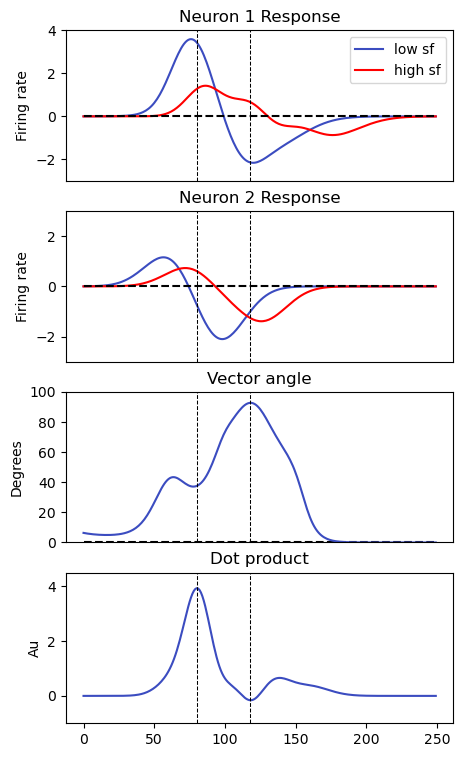

In [33]:
fig, ax = plt.subplots(4, figsize = (5,9))
ax[0].plot(low_sf_1, label = 'low sf')
ax[0].plot(high_sf_1, color = 'red', label = 'high sf')
ax[0].plot([t0]*250, np.linspace(-3,4,250), '--', color = 'black', linewidth = 0.75)
ax[0].plot([t1]*250, np.linspace(-3,4,250), '--', color = 'black', linewidth = 0.75)
ax[0].set_ylim(-3, 4)
ax[0].set_title("Neuron 1 Response")
ax[0].set_ylabel("Firing rate")
ax[0].legend()


ax[1].plot(low_sf_2)
ax[1].plot(high_sf_2, color = 'red')
ax[1].plot([t0]*250, np.linspace(-3,3,250), '--', color = 'black', linewidth = 0.75)
ax[1].plot([t1]*250, np.linspace(-3,3,250), '--', color = 'black', linewidth = 0.75)
ax[1].set_ylim(-3, 3)
ax[1].set_title("Neuron 2 Response")
ax[1].set_ylabel("Firing rate")


for i in range(3):
    ax[i].plot(np.zeros(250), '--', color = 'black')
    if i < 3:
        ax[i].set_xticks([])

ax[2].plot(ang)
ax[2].plot([t0]*250, np.linspace(0,100,250), '--', color = 'black', linewidth = 0.75)
ax[2].plot([t1]*250, np.linspace(0,100,250), '--', color = 'black', linewidth = 0.75)
ax[2].set_ylim(0, 100)
ax[2].set_title("Vector angle")
ax[2].set_ylabel("Degrees")

ax[3].plot(dotprod)
ax[3].plot([t0]*250, np.linspace(-1,4.5,250), '--', color = 'black', linewidth = 0.75)
ax[3].plot([t1]*250, np.linspace(-1,4.5,250), '--', color = 'black', linewidth = 0.75)
ax[3].set_ylim(-1, 4.5)
ax[3].set_title("Dot product")
ax[3].set_ylabel("Au")

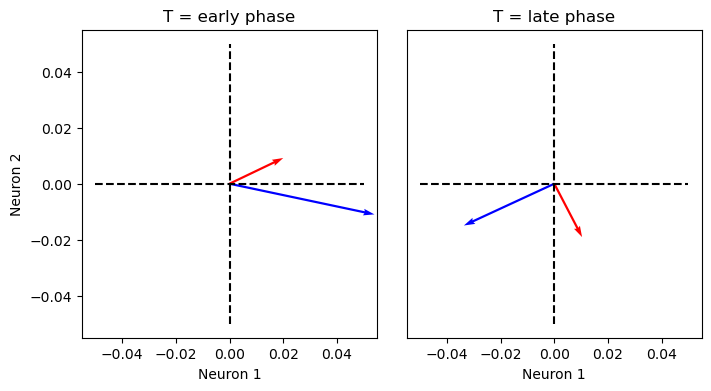

In [34]:
fig, ax = plt.subplots(1,2, figsize = (8, 4))

t = t0
v_l_v1 = np.array([low_sf_1[t], low_sf_2[t]])
v_h_v1 = np.array([high_sf_1[t], high_sf_2[t]])

scale = 7
ax[0].quiver(
    0,0, 
    *v_l_v1, 
    scale = scale, color = 'blue'
)
ax[0].quiver(
    0,0, 
    *v_h_v1, 
    scale = scale, color = 'red'
)

ax[0].set_xlabel('Neuron 1')
ax[0].set_ylabel('Neuron 2')
ax[0].set_title("T = early phase")

t = t1
v_l_v1 = np.array([low_sf_1[t], low_sf_2[t]])
v_h_v1 = np.array([high_sf_1[t], high_sf_2[t]])

scale = 7
ax[1].quiver(
    0,0, 
    *v_l_v1, 
    scale = scale, color = 'blue'
)
ax[1].quiver(
    0,0, 
    *v_h_v1, 
    scale = scale, color = 'red'
)

for i in range(2):
    ax[i].plot([0]*250, np.linspace(-0.05, 0.05, 250), '--', color = 'black')
    ax[i].plot(np.linspace(-0.05, 0.05, 250), [0]*250, '--', color = 'black')

ax[1].set_xlabel('Neuron 1')
ax[1].set_yticks([])
ax[1].set_title("T = late phase")
fig.subplots_adjust(wspace=0.1)

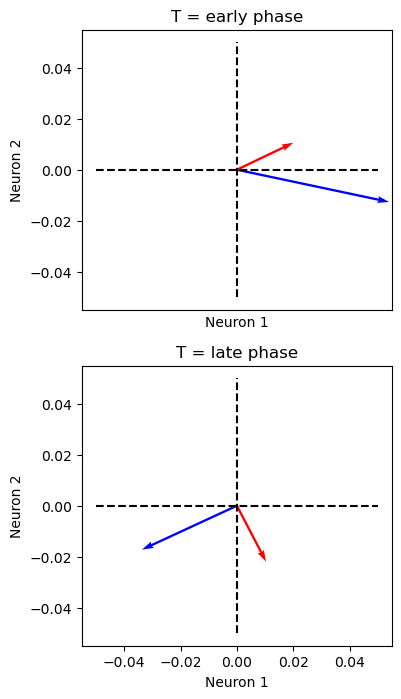

In [35]:
fig, ax = plt.subplots(2,1, figsize = (4, 8))

t = t0
v_l_v1 = np.array([low_sf_1[t], low_sf_2[t]])
v_h_v1 = np.array([high_sf_1[t], high_sf_2[t]])

scale = 7
ax[0].quiver(
    0,0, 
    *v_l_v1, 
    scale = scale, color = 'blue'
)
ax[0].quiver(
    0,0, 
    *v_h_v1, 
    scale = scale, color = 'red'
)

ax[0].set_xlabel('Neuron 1')
ax[0].set_ylabel('Neuron 2')
ax[0].set_title("T = early phase")

t = t1
v_l_v1 = np.array([low_sf_1[t], low_sf_2[t]])
v_h_v1 = np.array([high_sf_1[t], high_sf_2[t]])

scale = 7
ax[1].quiver(
    0,0, 
    *v_l_v1, 
    scale = scale, color = 'blue'
)
ax[1].quiver(
    0,0, 
    *v_h_v1, 
    scale = scale, color = 'red'
)

for i in range(2):
    ax[i].plot([0]*250, np.linspace(-0.05, 0.05, 250), '--', color = 'black')
    ax[i].plot(np.linspace(-0.05, 0.05, 250), [0]*250, '--', color = 'black')

ax[1].set_xlabel('Neuron 1')
ax[1].set_ylabel('Neuron 2')
ax[0].set_xticks([])
ax[1].set_title("T = late phase")
fig.subplots_adjust(wspace=0.1)

In [36]:
from itertools import combinations
from scipy import stats

In [37]:
def pairwise_vector_correlations(population_resp, sfs):
    sf_combos = list(combinations(sfs, 2)) # list of comparisons of each unique SF condition
    sf_combo_idx = list(combinations(np.arange(len(sfs)),2)) # index wise comparisons of the SF conditions
    sf_octave_diff = np.array([np.log2(x[1]/x[0]) for x in sf_combos]) # octave difference of each SF comparison
    sf_diff_idx = np.argsort(sf_octave_diff) # combo index sorted from lowest to highest octave difference

    corr = np.zeros((sf_diff_idx.shape[0], 250))
    for i, comp in enumerate(sf_combo_idx):
        for t in range(250):
            corr[i, t] = vector_angle(population_resp[comp[0],t,:], 
            population_resp[comp[1],t,:], 'radians')
    corr = corr[sf_diff_idx]

    return corr

In [38]:
resp = predictions[best][:2].numpy().transpose(1,2,0)

In [39]:
corr = pairwise_vector_correlations(resp, X.numpy())

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)


In [40]:
def calculate_sign_sum(X):
    ## Calculate enhancement and suppression sums over time
    nunit, T, nsf = X.shape
    exc_timecourse = np.zeros((T, nsf))
    sup_timecourse = np.zeros((T, nsf))
    for t in range(T):
        for sf in range(nsf):
            exc = X[:,t,sf][X[:,t,sf] > 0].sum()
            sup = X[:,t,sf][X[:,t,sf] < 0].sum()
            exc_timecourse[t,sf] = exc
            sup_timecourse[t,sf] = sup
                
    return exc_timecourse, sup_timecourse

def calculate_esi(exc, sup):
    return (
        (exc - np.abs(sup))
        / (np.abs(sup) + exc)
    ) 

def calculate_desi(esi, return_average = True):
    sf_i = np.arange(0,10)
    comparisons = list(combinations(sf_i, 2))
    
    si_distance = np.zeros((45, 250))

    for i, c in enumerate(comparisons):
        distance = np.abs(esi.T[c[0]] - esi.T[c[1]])
        si_distance[i,:] = distance

    return si_distance

In [41]:
exc, sup = calculate_sign_sum(resp.transpose(2,1,0))

In [42]:
esi = calculate_esi(exc, sup)

Text(0.5, 1.0, 'SUP (last 5ms)')

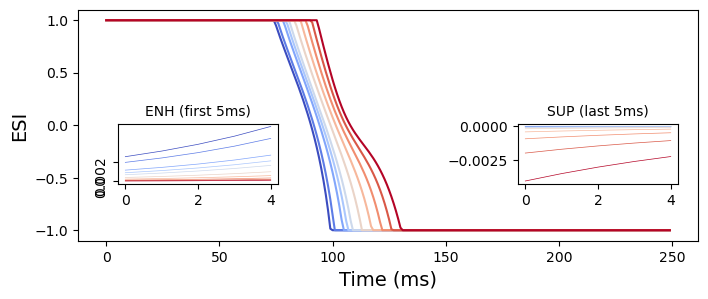

In [43]:
cmap = plt.get_cmap('coolwarm') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))
fig, ax = plt.subplots(figsize = (8,3))
ax.plot(esi)
ax.set_ylabel("ESI", fontsize = 14)
ax.set_xlabel("Time (ms)", fontsize = 14)

ax2 = fig.add_axes([0.175, 0.3, 0.2, 0.2])
ax2.plot(exc[:5], linewidth = 0.5)
ax2.set_yticks(np.arange(0,0.003, 0.002))
ax2.set_title('ENH (first 5ms)', fontsize = 10)
ax2.set_yticklabels(np.arange(0,0.003, 0.002), rotation = 90)
ax3 = fig.add_axes([0.675, 0.3, 0.2, 0.2])
ax3.plot(sup[-5:], linewidth = 0.5)
ax3.set_title('SUP (last 5ms)', fontsize = 10)

In [44]:
desi = calculate_desi(esi)

In [45]:
sf_combos = list(combinations(X, 2)) # list of comparisons of each unique SF condition
sf_combo_idx = list(combinations(np.arange(len(X)),2)) # index wise comparisons of the SF conditions
sf_octave_diff = np.array([np.log2(x[1]/x[0]) for x in sf_combos]) # octave difference of each SF comparison
sf_diff_idx = np.argsort(sf_octave_diff) # combo index sorted from lowest to highest octave difference
corr[np.where(np.isnan(corr))] = 0

Text(0.5, 1.0, 'SF vector dESI')

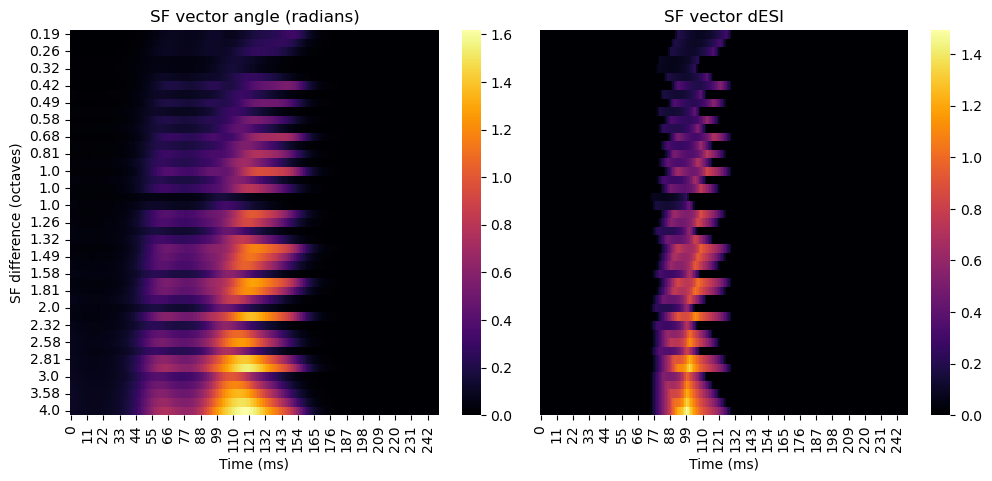

In [46]:
fig, ax = plt.subplots(1,2, figsize = (12, 5))

cmap = 'inferno'
sns.heatmap(
    corr, ax = ax[0], 
    cmap = cmap
)
sns.heatmap(
    desi[sf_diff_idx], ax = ax[1], 
    cmap = cmap
)

for i in range(2):
    ax[i].set_xlabel("Time (ms)")
plt.subplots_adjust(wspace = 0.02)
ax[0].set_yticklabels(sf_octave_diff[sf_diff_idx][::2].round(2))
ax[0].set_ylabel("SF difference (octaves)")
ax[1].set_yticks([])
ax[0].set_title("SF vector angle (radians)")
ax[1].set_title("SF vector dESI")

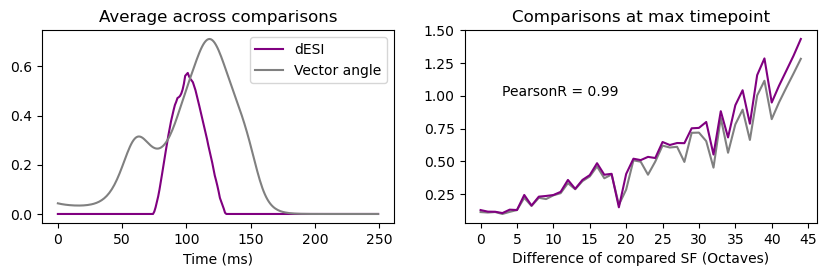

In [47]:
fig, ax = plt.subplots(1,2, figsize = (10,2.5))
ax[0].plot(desi[sf_diff_idx].mean(0), color = 'purple', label = 'dESI')
ax[0].plot(corr.mean(0), color = 'gray', label = 'Vector angle')
ax[0].set_xlabel("Time (ms)")
ax[0].set_title("Average across comparisons")

pr = stats.pearsonr(corr[:,100], desi[sf_diff_idx,100])[0].round(2)
ax[1].text(3, 1, f"PearsonR = {pr}")
ax[1].plot(corr[:,100], '-', color = 'gray')
ax[1].plot(desi[sf_diff_idx,100], '-', color = 'purple')
ax[1].set_xticks(np.arange(0,50,5))
ax[1].set_xlabel("Difference of compared SF (Octaves)")
ax[1].set_title("Comparisons at max timepoint")

ax[0].legend()

In [48]:
def desi_corr(sample):
    predictions = sgcc.predict(X)
    resp = predictions[sample][:2].numpy().transpose(1,2,0)
    corr = pairwise_vector_correlations(resp, X.numpy())

    exc, sup = calculate_sign_sum(resp.transpose(2,1,0))
    esi = calculate_esi(exc, sup)
    desi = calculate_desi(esi)

    sf_combos = list(combinations(X, 2)) # list of comparisons of each unique SF condition
    sf_combo_idx = list(combinations(np.arange(len(X)),2)) # index wise comparisons of the SF conditions
    sf_octave_diff = np.array([np.log2(x[1]/x[0]) for x in sf_combos]) # octave difference of each SF comparison
    sf_diff_idx = np.argsort(sf_octave_diff) # combo index sorted from lowest to highest octave difference
    corr[np.where(np.isnan(corr))] = 0

    return corr, desi[sf_diff_idx], resp

In [49]:
sgcc.set_parameter(*['dLGN', [best], [0,1,2], [1], 'fts', 21])

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)


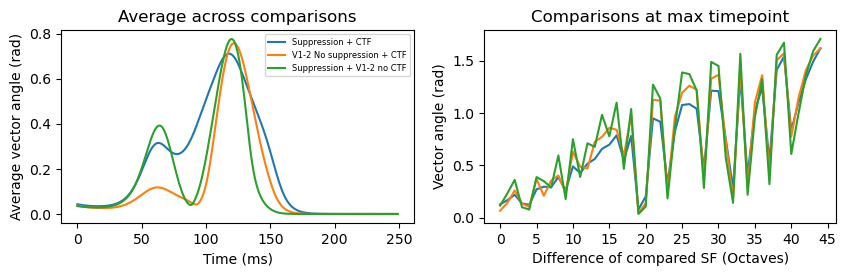

In [50]:
## Suppression + CTF
## 2x No suppression + CTF
## V1-1 No suppression + CTF
## V1-2 No suppression + CTF
## Suppression + 2x no CTF
## Suppression + V1-1 no CTF
## Suppression + v1-2 no CTF
cmap = plt.get_cmap('tab10') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))

labels = [
    'Suppression + CTF',
    'V1-2 No suppression + CTF',
    'Suppression + V1-2 no CTF',
]

conditions = [
    ['V1', [best], [None], [1], 'inh_w', 0],
    ['dLGN', [best], [0,1,2], [1], 'fts', 21],
]

sgcc = SGCCircuit(param_bounds)
sgcc.load_saved_parameters(params)
corr, desi, r = desi_corr(best)
fig, ax = plt.subplots(1,2, figsize = (10,2.5))
ax[0].plot(corr.mean(0), label = labels[0])
ax[0].set_xlabel("Time (ms)")
ax[0].set_title("Average across comparisons")

ax[1].plot(corr[:,t1], '-')
ax[1].set_xticks(np.arange(0,50,5))
ax[1].set_xlabel("Difference of compared SF (Octaves)")
ax[1].set_title("Comparisons at max timepoint")

ax[0].legend(fontsize = 6)
ax[0].legend(fontsize = 6)
ylabels = ['Average vector angle (rad)', 'Vector angle (rad)']
for i in range(2):
    ax[i].set_ylabel(ylabels[i])
for i, cond in enumerate(conditions):
    sgcc.set_parameter(*cond)
    corr, desi, r = desi_corr(best)
    
    ax[0].plot(corr.mean(0), label = labels[i+1])
    ax[0].set_xlabel("Time (ms)")
    ax[0].set_title("Average across comparisons")
    t = np.where(corr.mean(0) == corr.mean(0).max())[0][0]
    ax[1].plot(corr[:,t])
    ax[1].set_xticks(np.arange(0,50,5))
    ax[1].set_xlabel("Difference of compared SF (Octaves)")
    ax[1].set_title("Comparisons at max timepoint")

    ax[0].legend(fontsize = 6)

    sgcc = SGCCircuit(param_bounds)
    sgcc.load_saved_parameters(params)


In [51]:
np.radians(90)

1.5707963267948966

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)


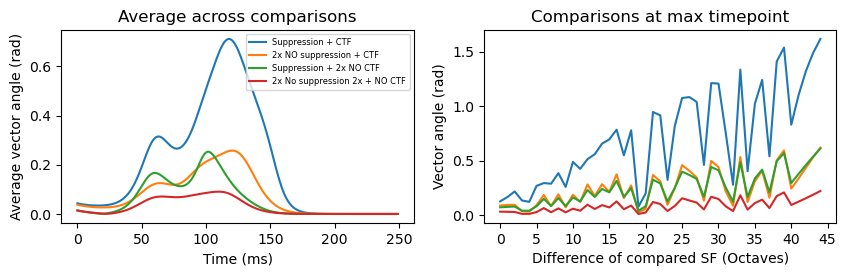

In [52]:
## Suppression + CTF
## 2x No suppression + CTF
## V1-1 No suppression + CTF
## V1-2 No suppression + CTF
## Suppression + 2x no CTF
## Suppression + V1-1 no CTF
## Suppression + v1-2 no CTF
cmap = plt.get_cmap('tab10') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))

labels = [
    'Suppression + CTF',
    '2x NO suppression + CTF',
    'Suppression + 2x NO CTF',
    '2x No suppression 2x + NO CTF',
]

conditions = [
    ['V1', [best], [None], [0,1], 'inh_w', 0],
    ['dLGN', [best], [0,1,2], [0,1], 'fts', 21],
    [['V1', [best], [None], [0,1], 'inh_w', 0],
    ['dLGN', [best], [0,1,2], [0,1], 'fts', 21],]
]

sgcc = SGCCircuit(param_bounds)
sgcc.load_saved_parameters(params)
corr, desi, r = desi_corr(best)
fig, ax = plt.subplots(1,2, figsize = (10,2.5))
ax[0].plot(corr.mean(0), label = labels[0])
ax[0].set_xlabel("Time (ms)")
ax[0].set_title("Average across comparisons")

ax[1].plot(corr[:,t1], '-')
ax[1].set_xticks(np.arange(0,50,5))
ax[1].set_xlabel("Difference of compared SF (Octaves)")
ax[1].set_title("Comparisons at max timepoint")

ax[0].legend(fontsize = 6)
ylabels = ['Average vector angle (rad)', 'Vector angle (rad)']
for i in range(2):
    ax[i].set_ylabel(ylabels[i])
for i, cond in enumerate(conditions):
    if i == 2:
        sgcc.set_parameter(*cond[0])
        sgcc.set_parameter(*cond[1])
    else:
        sgcc.set_parameter(*cond)
    corr, desi, r = desi_corr(best)
    
    ax[0].plot(corr.mean(0), label = labels[i+1])
    ax[0].set_xlabel("Time (ms)")
    ax[0].set_title("Average across comparisons")
    t = np.where(corr.mean(0) == corr.mean(0).max())[0][0]
    ax[1].plot(corr[:,t])
    ax[1].set_xticks(np.arange(0,50,5))
    ax[1].set_xlabel("Difference of compared SF (Octaves)")
    ax[1].set_title("Comparisons at max timepoint")

    ax[0].legend(fontsize = 6)

    sgcc = SGCCircuit(param_bounds)
    sgcc.load_saved_parameters(params)


In [53]:
inh_center = sgcc.params['V1_params'][best,:,0,1,0,0].numpy()
inh_std = sgcc.params['V1_params'][:,:,0,1,0,0].numpy().std(0)

In [54]:
conditions = [
    ['V1', [best], [None], [0], 'inh_w', inh_center[0]],
    ['V1', [best], [None], [1], 'inh_w', inh_center[1]]
]
conditions[0][:-1]

['V1', [71], [None], [0], 'inh_w']

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3389046984.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize = 6)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)


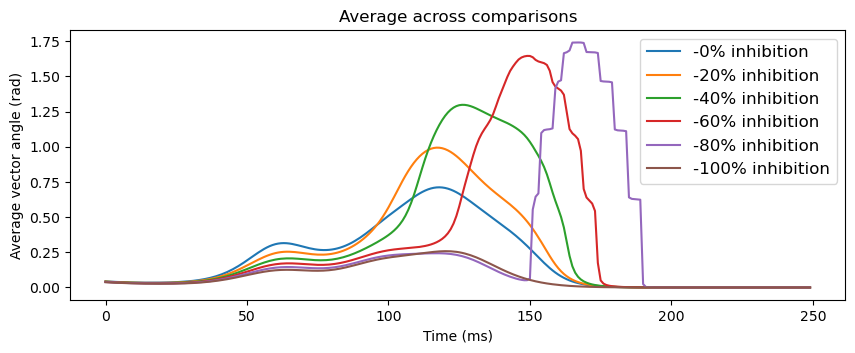

In [55]:
## Suppression + CTF
## 2x No suppression + CTF
## V1-1 No suppression + CTF
## V1-2 No suppression + CTF
## Suppression + 2x no CTF
## Suppression + V1-1 no CTF
## Suppression + v1-2 no CTF
cmap = plt.get_cmap('tab10') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))

conditions = [
    ['V1', [best], [None], [0], 'inh_w', inh_center[0]],
    ['V1', [best], [None], [1], 'inh_w', inh_center[1]]
]

sgcc = SGCCircuit(param_bounds)
sgcc.load_saved_parameters(params)

fig, ax = plt.subplots(1, figsize = (10,3.5))
ax.set_xlabel("Time (ms)")
ax.set_title("Average across comparisons")

ax.legend(fontsize = 6)
ylabels = ['Average vector angle (rad)', 'Vector angle (rad)']

ax.set_ylabel(ylabels[0])
for i in range(0,120,20):

    # print(conditions[0][-1]-(i*(conditions[0][-1]/100)), conditions[1][-1]-(i*(conditions[1][-1]/100)))
    sgcc.set_parameter(*conditions[0][:-1], np.clip(conditions[0][-1]-(i*(conditions[0][-1]/100)), 0, 3))
    sgcc.set_parameter(*conditions[1][:-1], np.clip(conditions[1][-1]-(i*(conditions[1][-1]/100)), 0, 3))

    corr, dotprod, resp = desi_corr(best)
    
    ax.plot(corr.mean(0), label = f"-{i}% inhibition")
    ax.set_xlabel("Time (ms)")
    ax.set_title("Average across comparisons")
    t = np.where(corr.mean(0) == corr.mean(0).max())[0][0]

    ax.legend(fontsize = 12)

    sgcc = SGCCircuit(param_bounds)
    sgcc.load_saved_parameters(params)


C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\953407619.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize = 6)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)


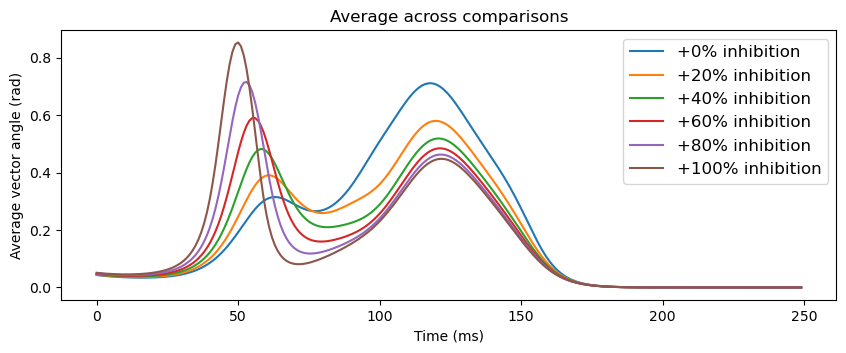

In [56]:
## Suppression + CTF
## 2x No suppression + CTF
## V1-1 No suppression + CTF
## V1-2 No suppression + CTF
## Suppression + 2x no CTF
## Suppression + V1-1 no CTF
## Suppression + v1-2 no CTF
cmap = plt.get_cmap('tab10') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))

conditions = [
    ['V1', [best], [None], [0], 'inh_w', inh_center[0]],
    ['V1', [best], [None], [1], 'inh_w', inh_center[1]]
]

sgcc = SGCCircuit(param_bounds)
sgcc.load_saved_parameters(params)

fig, ax = plt.subplots(1, figsize = (10,3.5))
ax.set_xlabel("Time (ms)")
ax.set_title("Average across comparisons")

ax.legend(fontsize = 6)
ylabels = ['Average vector angle (rad)', 'Vector angle (rad)']

ax.set_ylabel(ylabels[0])
for i in range(0,120,20):

    # print(conditions[0][-1]-(i*(conditions[0][-1]/100)), conditions[1][-1]-(i*(conditions[1][-1]/100)))
    sgcc.set_parameter(*conditions[0][:-1], np.clip(conditions[0][-1]+(i*(conditions[0][-1]/100)), 0, 3))
    sgcc.set_parameter(*conditions[1][:-1], np.clip(conditions[1][-1]+(i*(conditions[1][-1]/100)), 0, 3))

    corr, dotprod, resp = desi_corr(best)
    
    ax.plot(corr.mean(0), label = f"+{i}% inhibition")
    ax.set_xlabel("Time (ms)")
    ax.set_title("Average across comparisons")
    t = np.where(corr.mean(0) == corr.mean(0).max())[0][0]

    ax.legend(fontsize = 12)

    sgcc = SGCCircuit(param_bounds)
    sgcc.load_saved_parameters(params)


In [57]:
def desi_corr(sample):
    predictions = sgcc.predict(X)
    resp = predictions[sample][:2].numpy().transpose(1,2,0)
    # for n in range(2):
    #     resp[:,:,n] = resp[:,:,n] + np.random.uniform(-0.01,0.01, resp[:,:,n].shape)
    # resp[:,:,0] = np.roll(resp[:,:,0], 20)
    corr, dotprod = pairwise_vector_correlations(resp, X.numpy())

    exc, sup = calculate_sign_sum(resp.transpose(2,1,0))
    esi = calculate_esi(exc, sup)
    desi = calculate_desi(esi)

    sf_combos = list(combinations(X, 2)) # list of comparisons of each unique SF condition
    sf_combo_idx = list(combinations(np.arange(len(X)),2)) # index wise comparisons of the SF conditions
    sf_octave_diff = np.array([np.log2(x[1]/x[0]) for x in sf_combos]) # octave difference of each SF comparison
    sf_diff_idx = np.argsort(sf_octave_diff) # combo index sorted from lowest to highest octave difference
    corr[np.where(np.isnan(corr))] = 0

    return corr, dotprod, desi[sf_diff_idx], resp

In [58]:
def pairwise_vector_correlations(population_resp, sfs):
    sf_combos = list(combinations(sfs, 2)) # list of comparisons of each unique SF condition
    sf_combo_idx = list(combinations(np.arange(len(sfs)),2)) # index wise comparisons of the SF conditions
    sf_octave_diff = np.array([np.log2(x[1]/x[0]) for x in sf_combos]) # octave difference of each SF comparison
    sf_diff_idx = np.argsort(sf_octave_diff) # combo index sorted from lowest to highest octave difference

    corr = np.zeros((sf_diff_idx.shape[0], 250))
    dotprod = np.zeros((sf_diff_idx.shape[0], 250))
    for i, comp in enumerate(sf_combo_idx):
        for t in range(250):
            corr[i, t] = vector_angle(population_resp[comp[0],t,:], 
            population_resp[comp[1],t,:], 'degrees')

            dotprod[i, t] = np.dot(population_resp[comp[0],t,:], 
            population_resp[comp[1],t,:])
    corr = corr[sf_diff_idx]
    dotprod = dotprod[sf_diff_idx]

    return corr, dotprod

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax1.set_xticklabels([100,150,200,250])
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax2.set_xticklabels([100,150,200,250])


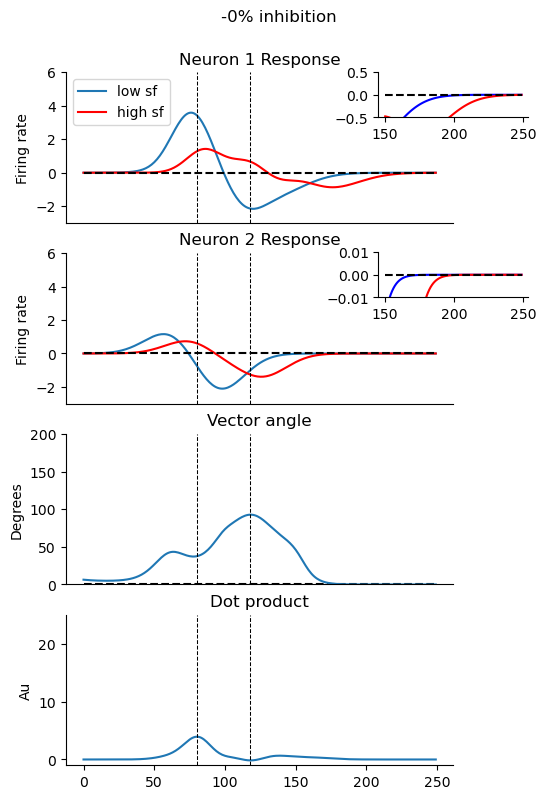

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax1.set_xticklabels([100,150,200,250])
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax2.set_xticklabels([100,150,200,250])


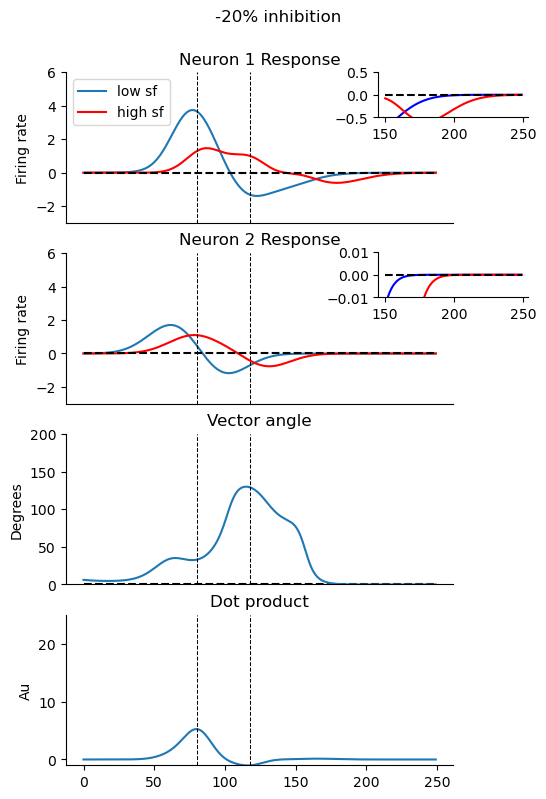

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax1.set_xticklabels([100,150,200,250])
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax2.set_xticklabels([100,150,200,250])


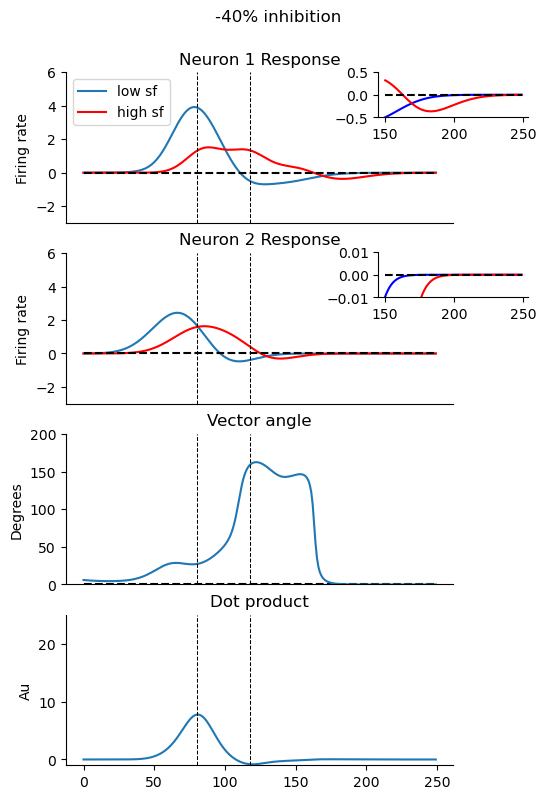

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax1.set_xticklabels([100,150,200,250])
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax2.set_xticklabels([100,150,200,250])


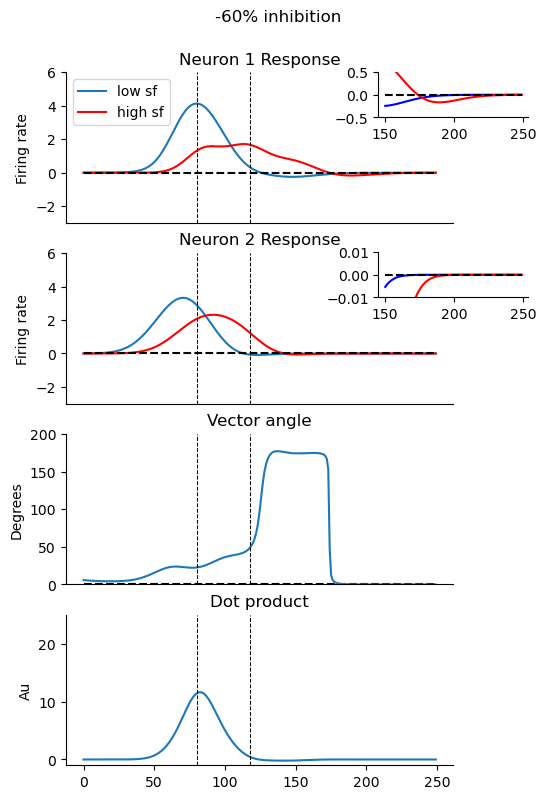

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax1.set_xticklabels([100,150,200,250])
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax2.set_xticklabels([100,150,200,250])


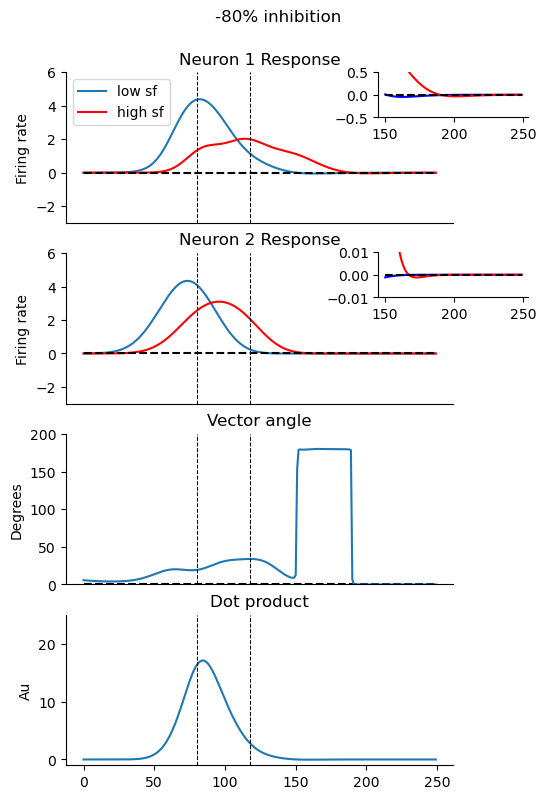

C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax1.set_xticklabels([100,150,200,250])
C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\3513582736.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mini_ax2.set_xticklabels([100,150,200,250])


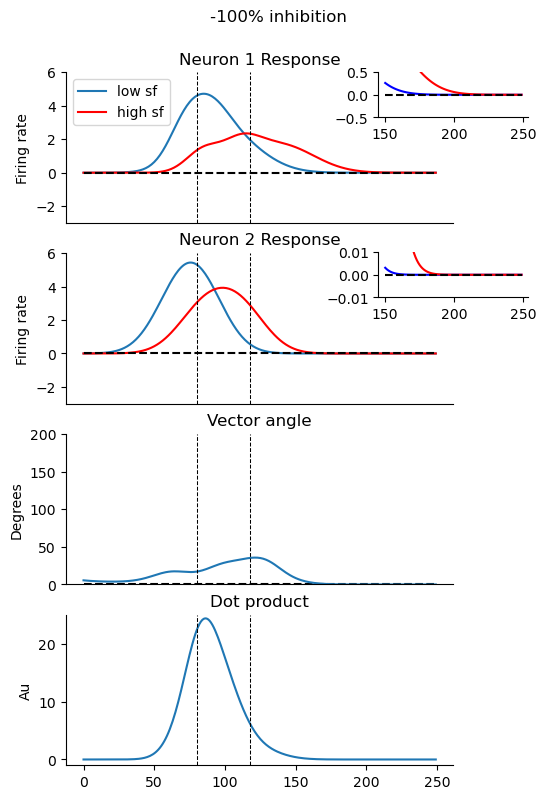

In [59]:
## Suppression + CTF
## 2x No suppression + CTF
## V1-1 No suppression + CTF
## V1-2 No suppression + CTF
## Suppression + 2x no CTF
## Suppression + V1-1 no CTF
## Suppression + v1-2 no CTF
cmap = plt.get_cmap('tab10') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))

conditions = [
    ['V1', [best], [None], [0], 'inh_w', inh_center[0]],
    ['V1', [best], [None], [1], 'inh_w', inh_center[1]]
]

sgcc = SGCCircuit(param_bounds)
sgcc.load_saved_parameters(params)


for i in range(0,120,20):

    #print(conditions[0][-1]-(i*(conditions[0][-1]/100)), conditions[1][-1]-(i*(conditions[1][-1]/100)))
    sgcc.set_parameter(*conditions[0][:-1], np.clip(conditions[0][-1]-(i*(conditions[0][-1]/100)), 0, 3))
    sgcc.set_parameter(*conditions[1][:-1], np.clip(conditions[1][-1]-(i*(conditions[1][-1]/100)), 0, 3))

    corr, dotprod, desi, resp = desi_corr(best)

    fig, ax = plt.subplots(4, figsize = (5,9))
    for i1 in range(4):
        ax[i1].spines['top'].set_visible(False)
        ax[i1].spines['right'].set_visible(False)

    low_sf_1 = resp[0,:,0]
    low_sf_2 = resp[0,:,1]

    high_sf_1 = resp[-1,:,0]
    high_sf_2 = resp[-1,:,1]

    ax[0].plot(low_sf_1, label = 'low sf')
    ax[0].plot(high_sf_1, color = 'red', label = 'high sf')
    ax[0].plot([t0]*250, np.linspace(-3,6,250), '--', color = 'black', linewidth = 0.75)
    ax[0].plot([t1]*250, np.linspace(-3,6,250), '--', color = 'black', linewidth = 0.75)
    ax[0].set_ylim(-3, 6)
    ax[0].set_title("Neuron 1 Response")
    ax[0].set_ylabel("Firing rate")
    ax[0].legend(loc = 'upper left')


    ax[1].plot(low_sf_2)
    ax[1].plot(high_sf_2, color = 'red')
    ax[1].plot([t0]*250, np.linspace(-3,6,250), '--', color = 'black', linewidth = 0.75)
    ax[1].plot([t1]*250, np.linspace(-3,6,250), '--', color = 'black', linewidth = 0.75)
    ax[1].set_ylim(-3, 6)
    ax[1].set_title("Neuron 2 Response")
    ax[1].set_ylabel("Firing rate")


    for i2 in range(3):
        ax[i2].plot(np.zeros(250), '--', color = 'black')
        if i2 < 3:
            ax[i2].set_xticks([])

    ax[2].plot(corr[-1])
    ax[2].plot([t0]*250, np.linspace(0,200,250), '--', color = 'black', linewidth = 0.75)
    ax[2].plot([t1]*250, np.linspace(0,200,250), '--', color = 'black', linewidth = 0.75)
    ax[2].set_ylim(0, 200)
    ax[2].set_title("Vector angle")
    ax[2].set_ylabel("Degrees")

    ax[3].plot(dotprod[-1])
    ax[3].plot([t0]*250, np.linspace(-1,25,250), '--', color = 'black', linewidth = 0.75)
    ax[3].plot([t1]*250, np.linspace(-1,25,250), '--', color = 'black', linewidth = 0.75)
    ax[3].set_ylim(-1, 25)
    ax[3].set_title("Dot product")
    ax[3].set_ylabel("Au")

    mini_ax1 = fig.add_axes([0.75, 0.83, 0.3, 0.05])
    mini_ax1.plot(low_sf_1[150:250], color = 'blue')
    mini_ax1.plot(high_sf_1[150:250], color = 'red')
    mini_ax1.set_ylim(-0.5,0.5)
    mini_ax1.plot(np.zeros(100), '--', color = 'black')
    mini_ax1.set_xticklabels([100,150,200,250])
    mini_ax1.spines['top'].set_visible(False)
    mini_ax1.spines['right'].set_visible(False)
    
    mini_ax2 = fig.add_axes([0.75, 0.63, 0.3, 0.05])
    mini_ax2.plot(low_sf_2[150:250], color = 'blue')
    mini_ax2.plot(high_sf_2[150:250], color = 'red')
    mini_ax2.set_ylim(-0.01,0.01)
    mini_ax2.plot(np.zeros(100), '--', color = 'black')
    mini_ax2.set_xticklabels([100,150,200,250])
    mini_ax2.spines['top'].set_visible(False)
    mini_ax2.spines['right'].set_visible(False)
    plt.suptitle(f"-{i}% inhibition", y = 0.95, x = 0.55)
    plt.show()



C:\Users\Sturdy\AppData\Local\Temp\ipykernel_41664\1226483008.py:16: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dotab/prodab)


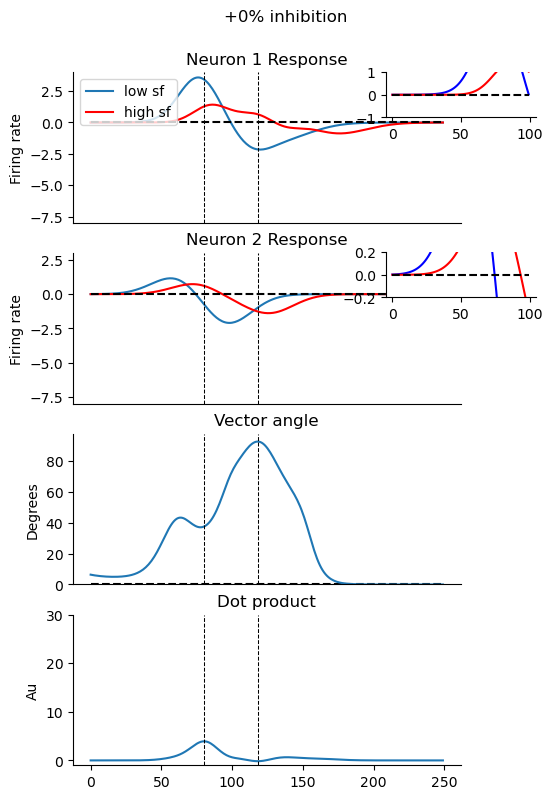

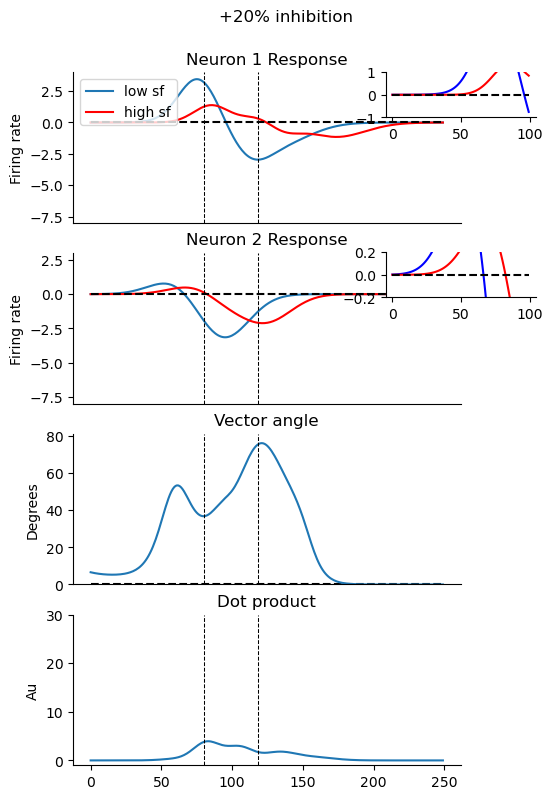

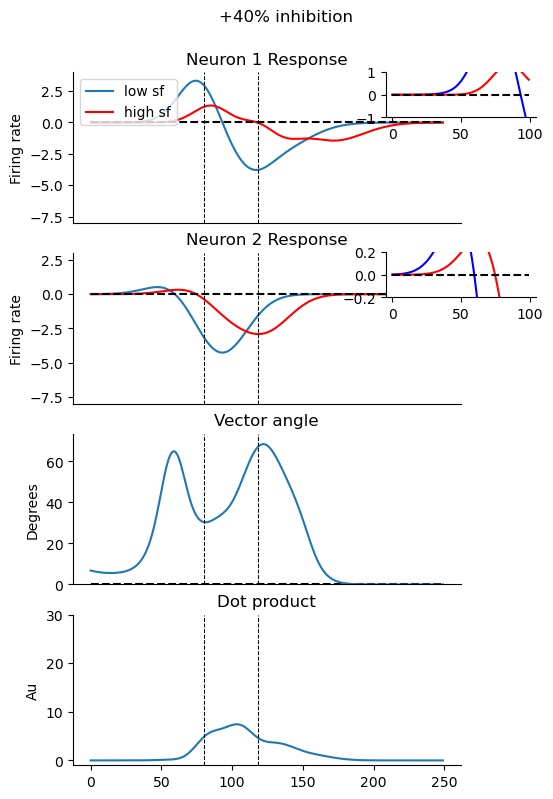

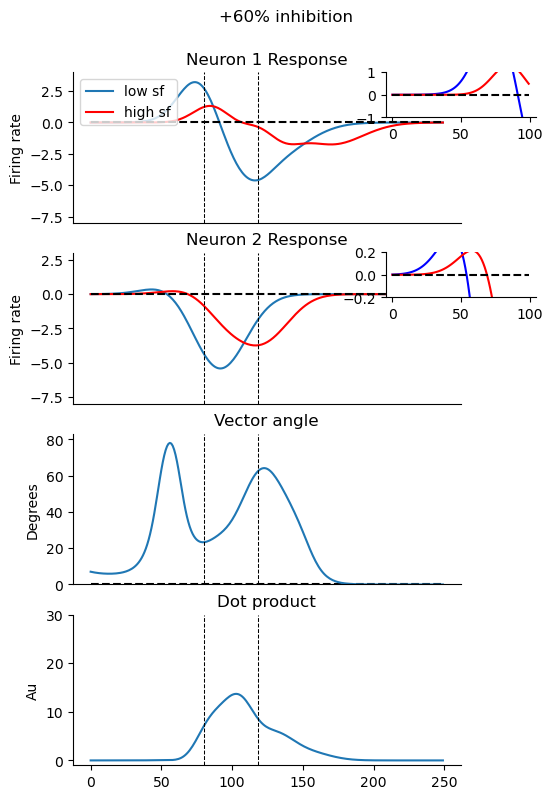

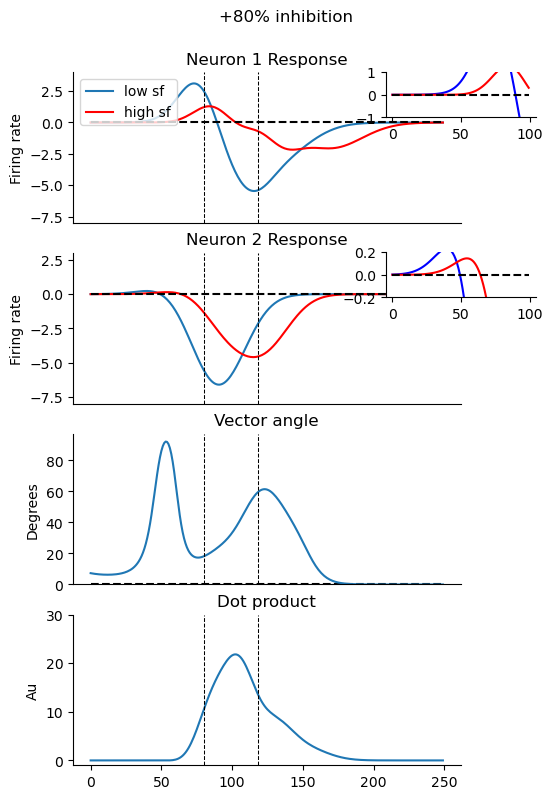

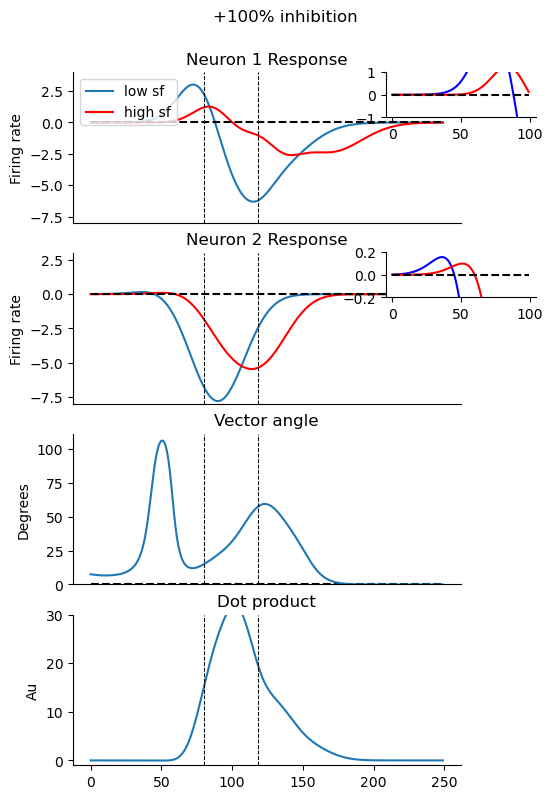

In [60]:
## Suppression + CTF
## 2x No suppression + CTF
## V1-1 No suppression + CTF
## V1-2 No suppression + CTF
## Suppression + 2x no CTF
## Suppression + V1-1 no CTF
## Suppression + v1-2 no CTF
cmap = plt.get_cmap('tab10') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))

conditions = [
    ['V1', [best], [None], [0], 'inh_w', inh_center[0]],
    ['V1', [best], [None], [1], 'inh_w', inh_center[1]]
]

sgcc = SGCCircuit(param_bounds)
sgcc.load_saved_parameters(params)


for i in range(0,120,20):

    #print(conditions[0][-1]-(i*(conditions[0][-1]/100)), conditions[1][-1]-(i*(conditions[1][-1]/100)))
    sgcc.set_parameter(*conditions[0][:-1], np.clip(conditions[0][-1]+(i*(conditions[0][-1]/100)), 0, 3))
    sgcc.set_parameter(*conditions[1][:-1], np.clip(conditions[1][-1]+(i*(conditions[1][-1]/100)), 0, 3))

    corr, dotprod, desi, resp = desi_corr(best)

    fig, ax = plt.subplots(4, figsize = (5,9))
    for i1 in range(4):
        ax[i1].spines['top'].set_visible(False)
        ax[i1].spines['right'].set_visible(False)

    low_sf_1 = resp[0,:,0]
    low_sf_2 = resp[0,:,1]

    high_sf_1 = resp[-1,:,0]
    high_sf_2 = resp[-1,:,1]

    ax[0].plot(low_sf_1, label = 'low sf')
    ax[0].plot(high_sf_1, color = 'red', label = 'high sf')
    ax[0].plot([t0]*250, np.linspace(-8,4,250), '--', color = 'black', linewidth = 0.75)
    ax[0].plot([t1]*250, np.linspace(-8,4,250), '--', color = 'black', linewidth = 0.75)
    ax[0].set_ylim(-8, 4)
    ax[0].set_title("Neuron 1 Response")
    ax[0].set_ylabel("Firing rate")
    ax[0].legend(loc = 'upper left')


    ax[1].plot(low_sf_2)
    ax[1].plot(high_sf_2, color = 'red')
    ax[1].plot([t0]*250, np.linspace(-8,3,250), '--', color = 'black', linewidth = 0.75)
    ax[1].plot([t1]*250, np.linspace(-8,3,250), '--', color = 'black', linewidth = 0.75)
    ax[1].set_ylim(-8, 3)
    ax[1].set_title("Neuron 2 Response")
    ax[1].set_ylabel("Firing rate")


    for i2 in range(3):
        ax[i2].plot(np.zeros(250), '--', color = 'black')
        if i2 < 3:
            ax[i2].set_xticks([])

    ax[2].plot(corr[-1])
    ax[2].plot([t0]*250, np.linspace(0,corr[-1].max()+5,250), '--', color = 'black', linewidth = 0.75)
    ax[2].plot([t1]*250, np.linspace(0,corr[-1].max()+5,250), '--', color = 'black', linewidth = 0.75)
    ax[2].set_ylim(0, corr[-1].max()+5)
    ax[2].set_title("Vector angle")
    ax[2].set_ylabel("Degrees")

    ax[3].plot(dotprod[-1])
    ax[3].plot([t0]*250, np.linspace(-1,30,250), '--', color = 'black', linewidth = 0.75)
    ax[3].plot([t1]*250, np.linspace(-1,30,250), '--', color = 'black', linewidth = 0.75)
    ax[3].set_ylim(-1, 30)
    ax[3].set_title("Dot product")
    ax[3].set_ylabel("Au")

    mini_ax1 = fig.add_axes([0.75, 0.83, 0.3, 0.05])
    mini_ax1.plot(low_sf_1[0:100], color = 'blue')
    mini_ax1.plot(high_sf_1[0:100], color = 'red')
    mini_ax1.set_ylim(-1,1)
    mini_ax1.plot(np.zeros(100), '--', color = 'black')
    #mini_ax1.set_xticklabels([0,50,100,250])
    mini_ax1.spines['top'].set_visible(False)
    mini_ax1.spines['right'].set_visible(False)
    
    mini_ax2 = fig.add_axes([0.75, 0.63, 0.3, 0.05])
    mini_ax2.plot(low_sf_2[0:100], color = 'blue')
    mini_ax2.plot(high_sf_2[0:100], color = 'red')
    mini_ax2.set_ylim(-0.2,0.2)
    mini_ax2.plot(np.zeros(100), '--', color = 'black')
    #mini_ax2.set_xticklabels([100,150,200,250])
    mini_ax2.spines['top'].set_visible(False)
    mini_ax2.spines['right'].set_visible(False)
    #mini_ax3 = fig.add_axes([1.2, 0.63, 0.3, 0.175])
    plt.suptitle(f"+{i}% inhibition", y = 0.95, x = 0.55)
    plt.show()

